In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/apurw/OneDrive/Documents/Data Glacier/Project _ Heathcare/Data/Healthcare_dataset.xlsx'
df = pd.read_excel(file_path)

# Display basic information and first few rows of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

(None,
   Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
 0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
 1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
 2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
 3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
 4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
 
   Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
 0        >75  GENERAL PRACTITIONER              Others   
 1      55-65  GENERAL PRACTITIONER              Others   
 2      65-75  GENERAL PRACTITIONER              Others   
 3        >75  GENERAL PRACTITIONER              Others   
 4        >75  GENERAL PRACTITIONER              Others   
 
        Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
 0  OB/GYN/Others/PCP/Unknown  ...                                   N   
 1  OB/GYN/Others/PCP/Unknown  ...         

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Persistency_Flag'])
y = df['Persistency_Flag']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing and split the data
X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2739, 3605), (685, 3605), (2739,), (685,))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Persistent', 'Persistent'], yticklabels=['Non-Persistent', 'Persistent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


Logistic Regression
Accuracy: 0.8087591240875912
Classification Report:
                 precision    recall  f1-score   support

Non-Persistent       0.83      0.87      0.85       431
    Persistent       0.77      0.70      0.73       254

      accuracy                           0.81       685
     macro avg       0.80      0.79      0.79       685
  weighted avg       0.81      0.81      0.81       685



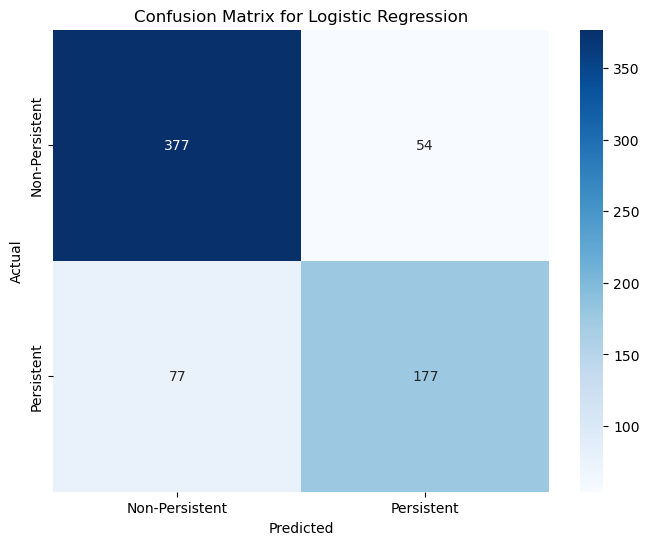

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")


Random Forest
Accuracy: 0.7927007299270074
Classification Report:
                 precision    recall  f1-score   support

Non-Persistent       0.81      0.88      0.84       431
    Persistent       0.76      0.64      0.70       254

      accuracy                           0.79       685
     macro avg       0.78      0.76      0.77       685
  weighted avg       0.79      0.79      0.79       685



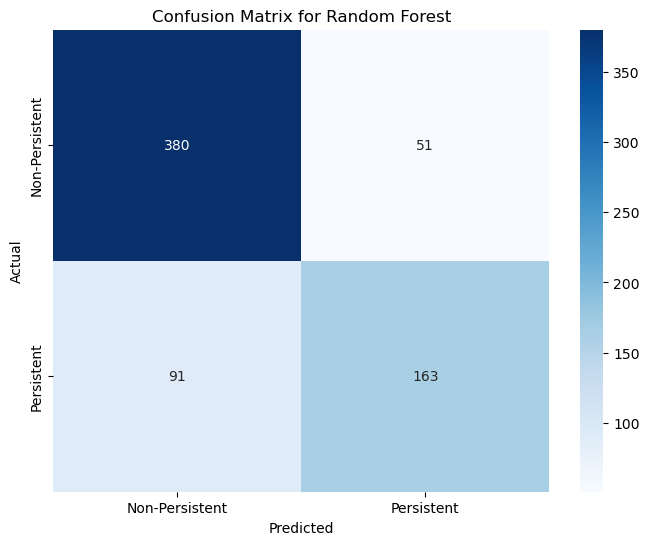

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Gradient Boosting
Accuracy: 0.8014598540145985
Classification Report:
                 precision    recall  f1-score   support

Non-Persistent       0.82      0.88      0.85       431
    Persistent       0.77      0.66      0.71       254

      accuracy                           0.80       685
     macro avg       0.79      0.77      0.78       685
  weighted avg       0.80      0.80      0.80       685



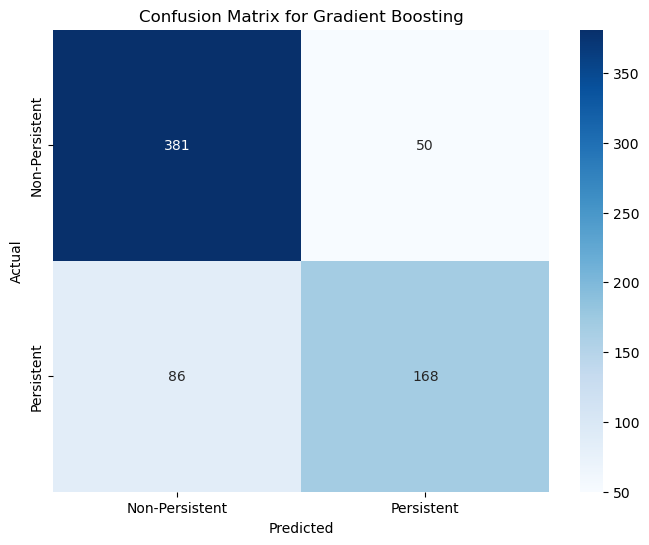

In [19]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")


Support Vector Machine
Accuracy: 0.8131386861313868
Classification Report:
                 precision    recall  f1-score   support

Non-Persistent       0.83      0.89      0.86       431
    Persistent       0.79      0.68      0.73       254

      accuracy                           0.81       685
     macro avg       0.81      0.79      0.79       685
  weighted avg       0.81      0.81      0.81       685



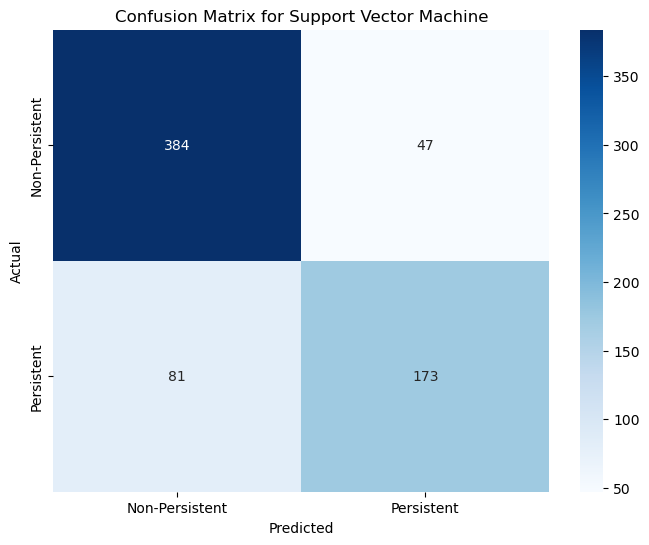

In [20]:
# Support Vector Machine
from sklearn.svm import SVC

# Train the model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")
